In [7]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

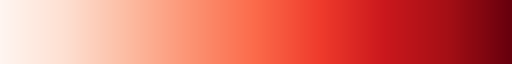

In [23]:
reds = cmap = plt.get_cmap('Reds')
reds

# Load MWPM data

In [2]:
with open("MWPM_L5-9-13-17-21-25-29_k1-2-3-4-5-6-7-8_ns50000_seed-1_threshold.pkl", "rb") as f:
    MWPM_threshold = pickle.load(f)

In [3]:
with open("MWPM_L5-9-13-17-21-25-29_k1-2-3-4_ns50000_seed-1.pkl", "rb") as f:
    MWPM_subthreshold_1 = pickle.load(f)

In [35]:
with open("MWPM_L5-9-13-17-21-25-29_k5-6-7-8_ns50000_seed-1.pkl", "rb") as f:
    MWPM_subthreshold_2 = pickle.load(f)

In [38]:
MWPM_subthreshold_1['logical_error'].shape

(4, 7, 5)

In [39]:
MWPM_threshold['logical_error'].shape

(8, 7, 20)

In [40]:
ps = np.concatenate([MWPM_subthreshold_1['ps'], MWPM_threshold['ps']])
print(ps)

[0.05       0.0553341  0.06123724 0.06777015 0.075      0.08
 0.08210526 0.08421053 0.08631579 0.08842105 0.09052632 0.09263158
 0.09473684 0.09684211 0.09894737 0.10105263 0.10315789 0.10526316
 0.10736842 0.10947368 0.11157895 0.11368421 0.11578947 0.11789474
 0.12      ]


In [42]:
logical_error = np.concatenate([np.concatenate([MWPM_subthreshold_1['logical_error'], MWPM_subthreshold_2['logical_error']]), MWPM_threshold['logical_error']], axis =2)
print(logical_error.shape)

(8, 7, 25)


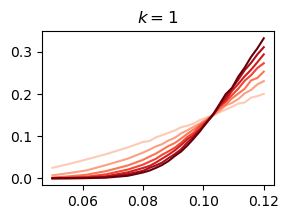

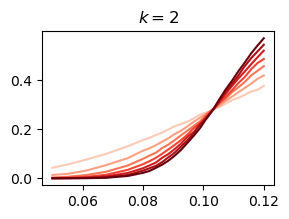

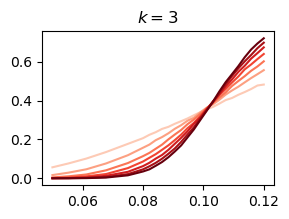

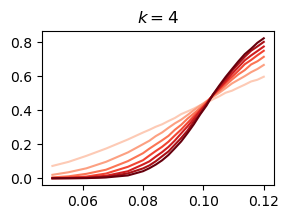

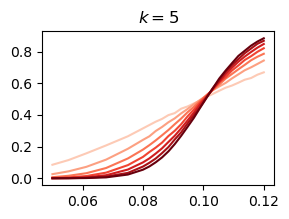

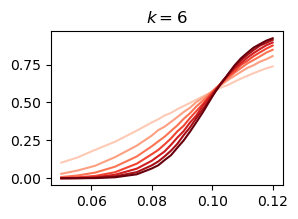

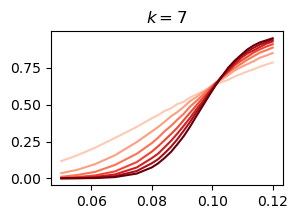

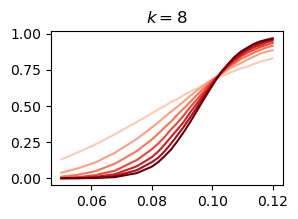

In [43]:
for j, k in enumerate(MWPM_threshold['ks']):
    fig = plt.figure(figsize=(3,2))
    ax = fig.gca()
    cs = reds(np.linspace(0.2, 1, len(MWPM_threshold['Ls'])))
    for i, (L, c) in enumerate(zip(MWPM_threshold['Ls'], cs)):
        ax.plot(ps, logical_error[j,i,:], label=f"$L={L}$", color=c)
        #ax.legend()
        ax.set_title(f"$k={k}$")

In [44]:
plt.close("all")

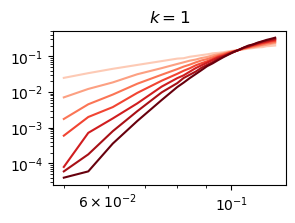

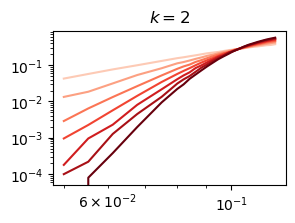

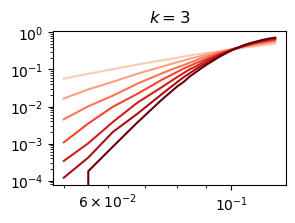

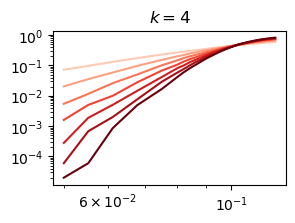

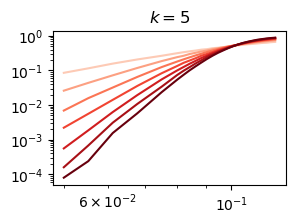

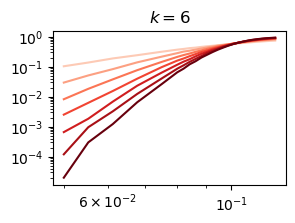

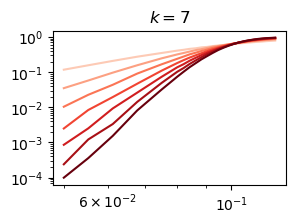

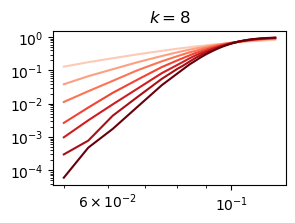

In [45]:
for j, k in enumerate(MWPM_threshold['ks']):
    fig = plt.figure(figsize=(3,2))
    ax = fig.gca()
    cs = reds(np.linspace(0.2, 1, len(MWPM_threshold['Ls'])))
    for i, (L, c) in enumerate(zip(MWPM_threshold['Ls'], cs)):
        ax.plot(ps, logical_error[j,i,:], label=f"$L={L}$", color=c)
        ax.set_title(f"$k={k}$")
    ax.set_xscale('log')
    ax.set_yscale('log')